# Endangered Species in US National Parks

This project explores the conservation of species in US National Parks.
We will look at data on the top 10 most visited US National Parks in 2022.
The dataset is provided by the National Park Service via their [NPSecies Database](https://irma.nps.gov/NPSpecies/).

This Notebook aims to investigate the following questions:
- How does conservation status differ across national parks?
- Are mammal species more likely to be protected than non-mammal species?
- Are native species more likely to be protected than non-native species?
- Are there any abundant species that are also classified as threatened or endangered?

### Load and Inspect Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
species = pd.read_csv('datasets/NPS_species_info.csv')
# print(species.info())
# species.head()

### Data Cleaning and Preparation

In [3]:
def clean_df_text(df):
    df.columns = df.columns.str.strip()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].str.title()
            df[column] = df[column].str.strip()
    return df

In [4]:
species = clean_df_text(species)

In [5]:
species['Category'].value_counts()

Insect                   15482
Vascular Plant           15415
Fungi                     5936
Spider/Scorpion           4846
Bird                      3161
Non-Vascular Plant        1868
Other Non-Vertebrates     1127
Chromista                 1007
Mammal                     794
Slug/Snail                 408
Fish                       370
Bacteria                   342
Protozoa                   282
Reptile                    248
Crab/Lobster/Shrimp        243
Amphibian                  177
Name: Category, dtype: int64

For this analysis, we will only be looking at **Amphibian**, **Bird**, **Fish**, **Mammal**, and **Reptile** categories.

In [6]:
amphibian = species['Category'] == 'Amphibian'
bird = species['Category'] == 'Bird'
fish = species['Category'] == 'Fish'
mammals = species['Category'] == 'Mammal'
reptile = species['Category'] == 'Reptile'

species = species[amphibian | bird | fish | mammals | reptile]

In [7]:
species['Category'].value_counts()

Bird         3161
Mammal        794
Fish          370
Reptile       248
Amphibian     177
Name: Category, dtype: int64

Now lets look at our Conversation status, and make a new column called **Protected**.

In [8]:
species['Conservation Status'].value_counts()

Least Concern         3367
Species Of Concern    1304
Endangered              31
Threatened              29
In Recovery             19
Name: Conservation Status, dtype: int64

In [9]:
species['Protected'] = species['Conservation Status'] != 'Least Concern'

Now we can drop uneccessary columns and start exploring the data relevant to our questions

In [10]:
drop_cols = ['Order', 'Family', 'Observations']
species = species.drop(drop_cols, axis=1)
species.head()

,Scientific Name,Common Names,Category,Park Name,Nativeness,Abundance,Conservation Status,Protected
0,Alces Alces,Moose,Mammal,Acadia National Park,Native,Rare,Least Concern,False
1,Odocoileus Virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Mammal,Acadia National Park,Native,Abundant,Least Concern,False
2,Canis Latrans,"Coyote, Eastern Coyote",Mammal,Acadia National Park,Non-Native,Common,Species Of Concern,True
3,Canis Lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Mammal,Acadia National Park,Native,NaN,Endangered,True
4,Vulpes Vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Mammal,Acadia National Park,Unknown,Common,Least Concern,False


### Exploration

In [11]:
scientific = species['Scientific Name'].nunique()
common = species['Common Names'].nunique()

In [12]:
print('Scientific Names: ' + str(scientific))
print('Common Names: ' + str(common))

Scientific Names: 1557
Common Names: 1871


We first notice that there are multiple entries for the same **Scientific Name** for multiple parks.

In [13]:
species[species['Scientific Name']=='Canis Lupus']

,Scientific Name,Common Names,Category,Park Name,Nativeness,Abundance,Conservation Status,Protected
3,Canis Lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Mammal,Acadia National Park,Native,NaN,Endangered,True
1719,Canis Lupus,Gray Wolf,Mammal,Glacier National Park,Native,Rare,Least Concern,False
6984,Canis Lupus,Gray Wolf,Mammal,Great Smoky Mountains National Park,Native,NaN,Endangered,True
35726,Canis Lupus,"Gray Wolf, Wolf",Mammal,Grand Teton National Park,Native,Uncommon,Endangered,True
37967,Canis Lupus,"Gray Wolf, Wolf",Mammal,Indiana Dunes National Park,Native,NaN,Endangered,True
40455,Canis Lupus,Gray Wolf,Mammal,Rocky Mountain National Park,Native,NaN,Endangered,True
43656,Canis Lupus,"Gray Wolf, Wolf",Mammal,Yellowstone National Park,Native,Common,Least Concern,False
47826,Canis Lupus,"Gray Wolf, Wolf",Mammal,Yosemite National Park,Unknown,NaN,Endangered,True


**Abundance** , **Conservation Status** , and **Protected** status vary from park to park.

In [14]:
print('** CATEGORIES **')
print()
print(species['Category'].value_counts())
print('--------------------------------')
print(species['Category'].value_counts(normalize=True))

** CATEGORIES **

Bird         3161
Mammal        794
Fish          370
Reptile       248
Amphibian     177
Name: Category, dtype: int64
--------------------------------
Bird         0.665474
Mammal       0.167158
Fish         0.077895
Reptile      0.052211
Amphibian    0.037263
Name: Category, dtype: float64


    Category  Scientific Name   Percent
0  Amphibian              124  0.079640
1       Bird              747  0.479769
2       Fish              231  0.148362
3     Mammal              276  0.177264
4    Reptile              179  0.114965
-------------------------------------------------


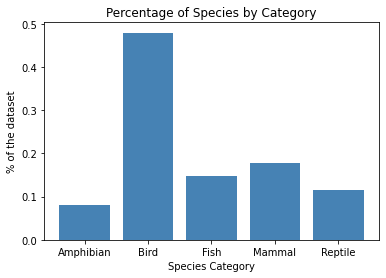

In [44]:
unique_category_counts = species.groupby('Category').agg({'Scientific Name':'nunique'}).reset_index()
unique_category_counts['Percent'] = unique_category_counts['Scientific Name'] / species['Scientific Name'].nunique()
print(unique_category_counts)
print('-------------------------------------------------')

plt.bar(unique_category_counts['Category'], unique_category_counts['Percent'], color = '#4682B4')
plt.title("Percentage of Species by Category")
plt.xlabel("Species Category")
plt.ylabel("% of the dataset")
plt.show()

The majority of our species appears to be **birds** at about 48%, followed by **mammals** (17.7%), **fishes** (14.8%), **reptiles** (11.5%), and **amphibians** (8.0%)

In [46]:
print('CONSERVATION STATUS')
print('-------------------')
print(species['Conservation Status'].value_counts())
print()
print(species['Conservation Status'].value_counts(normalize=True))

CONSERVATION STATUS
-------------------
Least Concern         3367
Species Of Concern    1304
Endangered              31
Threatened              29
In Recovery             19
Name: Conservation Status, dtype: int64

Least Concern         0.708842
Species Of Concern    0.274526
Endangered            0.006526
Threatened            0.006105
In Recovery           0.004000
Name: Conservation Status, dtype: float64


In [17]:
unique_status = species.groupby(['Scientific Name', 'Category'])\
                       .agg({'Conservation Status':pd.Series.mode, 'Protected':'sum'})\
                       .reset_index()

unique_status = unique_status.rename({'Protected': 'Protected Anywhere?'}, axis = 1)
print('Species per conservation category:')
print('--------------------------------')
print(unique_status['Conservation Status'].value_counts())
print()
print('Percentages of each category for the entire data set:')
print('--------------------------------')
print(unique_status['Conservation Status'].value_counts(normalize=True))

Species per conservation category:
--------------------------------
Least Concern                  1220
Species Of Concern              295
Endangered                       21
Threatened                       16
In Recovery                       4
[Endangered, Least Concern]       1
Name: Conservation Status, dtype: int64

Percentages of each category for the entire data set:
--------------------------------
Least Concern                  0.783558
Species Of Concern             0.189467
Endangered                     0.013487
Threatened                     0.010276
In Recovery                    0.002569
[Endangered, Least Concern]    0.000642
Name: Conservation Status, dtype: float64


Fortunately, it looks like the majority of the species are classified as **Least Concern** (1220 or 78.4%).
There are a large number of species that are classifed as **Species of Concern** (295 or 18.9%)
**Species of Concern** are at risk of being threatened or endangered.
A deeper analysis can highlight these species for further investigation.

In [18]:
unique_status['Conservation Status'] = unique_status['Conservation Status'].astype(str)

status_by_category = unique_status.pivot_table(index='Category',
                                              columns = 'Conservation Status',
                                              values = 'Scientific Name',
                                              aggfunc = 'count')
status_by_category = status_by_category.drop("['Endangered' 'Least Concern']", axis = 1)

status_by_category

Conservation Status,Endangered,In Recovery,Least Concern,Species Of Concern,Threatened
Category,,,,,
Amphibian,2.0,NaN,117.0,3.0,2.0
Bird,4.0,4.0,495.0,241.0,2.0
Fish,7.0,NaN,209.0,8.0,7.0
Mammal,8.0,NaN,237.0,29.0,2.0
Reptile,NaN,NaN,162.0,14.0,3.0


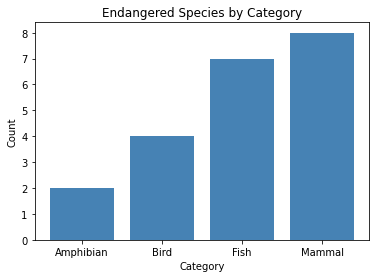

In [19]:
plt.bar(status_by_category.index, status_by_category["Endangered"], label = "Endangered", color = "#4682B4")
plt.title("Endangered Species by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

 - Its interesting that while **birds** make up the largest section of our Dataset, there are more endangered **mammals** (8) than endangered **birds** (4).
 - This helps answer one of our data questions of whether mammals are more favorited than non-mammals in their protective status.
 - With this in mind, let's also take a look back at our Protected column.

In [20]:
unique_status.groupby('Category').agg({'Protected Anywhere?':'sum'})

,Protected Anywhere?
Category,
Amphibian,7
Bird,1187
Fish,31
Mammal,130
Reptile,28


 - Finally, let's take a quick look at protected and un-protected species using the mode aggregation.

In [21]:
unique_status['Protected'] = unique_status['Conservation Status'] != 'Least Concern'

print(unique_status['Protected'].value_counts())
print()
print(unique_status['Protected'].value_counts(normalize=True))

False    1220
True      337
Name: Protected, dtype: int64

False    0.783558
True     0.216442
Name: Protected, dtype: float64


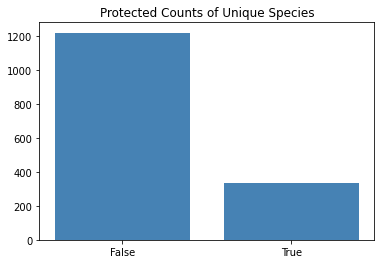

In [22]:
protected_counts = unique_status['Protected'].astype(int).value_counts()

plt.bar(protected_counts.index, protected_counts, color='#4682B4')
plt.title("Protected Counts of Unique Species")
plt.xticks(protected_counts.index, ['False', 'True'])
plt.yticks(range(0, 1221, 200))
plt.show()

Looking at the protection numbers, we see that that 1220 (or 78.4%) of species in our dataset are not protected, compared to 337 (or 21.6%) of species that are protected.

This information does a good job of summarizing the data set through the endangered lens we are hoping to explore.
With this information available, we can begin to draw conclusions on our 4 questions for this exercise.

### Data Question #1: How does conservation status differ across national parks?

 - Each national park holds unique species that have adapted to their specific habitat and natural ecoystems.
 - The impacts of a changing climate, invasive species, and other human related factors can cause challenges for these species.
 - To better understand this, let's take a look at how conservation status changes across the different parks in our dataset.

In [23]:
# species['Park Name'].value_counts()

status_by_park = species.pivot_table(index = 'Park Name',
                                    columns = 'Conservation Status',
                                    values = 'Scientific Name',
                                    aggfunc = 'count')
status_by_park.columns = ['Endangered','In Recovery','Least Concern','Species of Concern','Threatened']
status_by_park = status_by_park.reset_index()
status_by_park

,Park Name,Endangered,In Recovery,Least Concern,Species of Concern,Threatened
0,Acadia National Park,3.0,2.0,330.0,148.0,NaN
1,Glacier National Park,NaN,1.0,271.0,108.0,3.0
2,Grand Canyon National Park,5.0,3.0,496.0,173.0,6.0
3,Grand Teton National Park,1.0,2.0,256.0,113.0,2.0
4,Great Smoky Mountains National Park,9.0,1.0,505.0,115.0,3.0
5,Indiana Dunes National Park,4.0,4.0,389.0,144.0,1.0
6,Rocky Mountain National Park,1.0,1.0,259.0,109.0,3.0
7,Yellowstone National Park,1.0,2.0,299.0,137.0,4.0
8,Yosemite National Park,5.0,2.0,273.0,119.0,4.0
9,Zion National Park,2.0,1.0,289.0,138.0,3.0


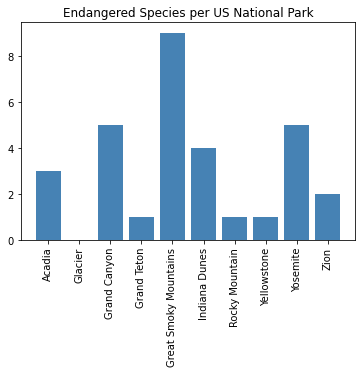

In [24]:
status_by_park['Short Park Name'] = status_by_park['Park Name'].apply(lambda x: x.split('National Park')[0].strip())

plt.bar(status_by_park['Short Park Name'], status_by_park['Endangered'], color='#4682B4', width = 0.8)
plt.tick_params(axis='x', labelrotation = 90)
plt.title('Endangered Species per US National Park')

plt.show()


We see diversity in endangered species across our parks.
**Great Smoky Mountains** National Park has the most endangered species (9), followed by **Grand Canyon** and **Yosemite** (5), **Indiana Dunes** (4), **Acadia** (3), **Zion** (2), and lastly the **Grand Teton**, **Rocky Mountain**, and **Yellowstone** (1). **Glacier** National Park has no endangered species in our dataset.
 
Lets also take a look at **Protected** species.

In [25]:
protected_by_park = species.groupby('Park Name').agg({'Protected': ['sum', 'mean']}).reset_index()
protected_by_park.columns = ['Park Name', 'Count Protected', 'Percent protected']
protected_by_park

,Park Name,Count Protected,Percent protected
0,Acadia National Park,153,0.316770
1,Glacier National Park,112,0.292428
2,Grand Canyon National Park,187,0.273792
3,Grand Teton National Park,118,0.315508
4,Great Smoky Mountains National Park,128,0.202212
5,Indiana Dunes National Park,153,0.282288
6,Rocky Mountain National Park,114,0.305630
7,Yellowstone National Park,144,0.325056
8,Yosemite National Park,130,0.322581
9,Zion National Park,144,0.332564


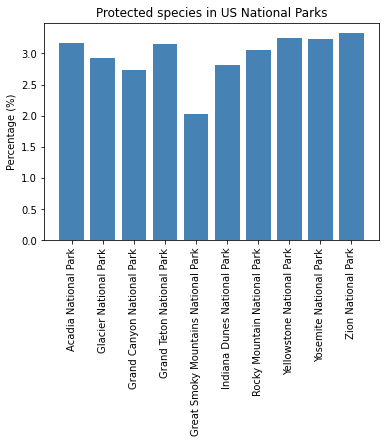

In [26]:
y_values = protected_by_park['Percent protected'] * 10
plt.bar(protected_by_park['Park Name'], y_values, color = '#4682B4')
plt.title('Protected species in US National Parks')
plt.tick_params(axis = 'x', labelrotation = 90)
plt.ylabel('Percentage (%)')
plt.show()

In [27]:
print("Protection Statistics Across All National Parks")
print('--------------------------------')
print("Mean %:", np.mean(protected_by_park['Percent protected']))
print("Std. Dev:", np.std(protected_by_park['Percent protected']))

Protection Statistics Across All National Parks
--------------------------------
Mean %: 0.29688286288771515
Std. Dev: 0.03643463118076456


### Data Question #2: Are mammal species more likely to be protected than non-mammal species?

We will explore this question by investigating the number of protected mammals compared to the number of protected non-mammals in our dataset.
Luckily, we have our unique_status variable already created to begin exploring this information.

In [28]:
unique_status.head()

,Scientific Name,Category,Conservation Status,Protected Anywhere?,Protected
0,Acanthis Flammea,Bird,Least Concern,0,False
1,Acanthus Flammea,Bird,Least Concern,0,False
2,Accipiter Cooperii,Bird,Species Of Concern,10,True
3,Accipiter Gentilis,Bird,Least Concern,0,False
4,Accipiter Striatus,Bird,Species Of Concern,10,True


In [29]:
category_counts = unique_status.pivot_table(columns = 'Protected',
                                           index = 'Category',
                                           values = 'Scientific Name', 
                                           aggfunc = 'count')

category_counts.columns = ['Not Protected', 'Protected']
category_counts = category_counts.reset_index()
category_counts['Percent Protected'] = category_counts['Protected'] / \
                                        (category_counts['Protected'] + category_counts['Not Protected']) * 100

category_counts

,Category,Not Protected,Protected,Percent Protected
0,Amphibian,117,7,5.645161
1,Bird,495,252,33.734940
2,Fish,209,22,9.523810
3,Mammal,237,39,14.130435
4,Reptile,162,17,9.497207


 - We are already starting to see some discrepancies based on the percentages, specifically 33.7% of birds are protected compared to the next largest group of mammals with 14.1%.

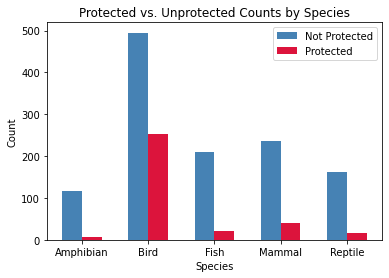

In [30]:
bar_width = 0.3
plt.bar(category_counts.index, category_counts['Not Protected'], width = bar_width, label = 'Not Protected', color = '#4682B4')
plt.bar(category_counts.index + bar_width, category_counts['Protected'], width = bar_width, label = 'Protected', color = '#DC143C')

plt.title('Protected vs. Unprotected Counts by Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(category_counts.index + bar_width / 2, category_counts['Category'].astype(str))
plt.legend()
plt.show()

Its starting to seem like there is an argument in favor of common protection regardless of species, but the number of birds stands out due to its larger representation in the dataset.
This is an excellent opportunity to run a **Chi-squared test** to verify a connection between the **Category** and **Protected** variables. 

In [31]:
from scipy.stats import chi2_contingency

In [32]:
contingency_table = pd.crosstab(unique_status['Category'], unique_status['Protected'])
contingency_table

Protected,False,True
Category,,
Amphibian,117,7
Bird,495,252
Fish,209,22
Mammal,237,39
Reptile,162,17


In [33]:
chi2, pval, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic: ", chi2)
print('p-value: ', pval)

Chi-square statistic:  127.87497939202984
p-value:  1.1086552917070772e-26


 - The Chi-squared test comparing the protected percentages across all categories of species resulted in a test statistic of 127.87 corresponding to a p-value of 1.11e-26 (extremely low, based on the standard threshold of 0.05). This leads us to reject the null hypothesis, that there is no association between category and protected status. However, this could be impacted by one particular category (**birds**, for example), so we'll need to investigate individual comparisons further.
 - We can start by comparing **Mammals** with **amphibians**.


In [34]:
category1 = 'Mammal'
category2 = 'Amphibian'

mammal_amphibian = unique_status[(unique_status['Category']== category1) | (unique_status['Category']==category2)]
contingency_table1 = pd.crosstab(mammal_amphibian['Category'], mammal_amphibian['Protected'])

chi2, pvalue, dof, expected = chi2_contingency(contingency_table1)

print("Chi-squared test statistic:", chi2)
print("P-value:", pvalue)

Chi-squared test statistic: 5.247851110300351
P-value: 0.021973891604423347


The Chi-squared test comparing the protected percentages of Mammals to Amphibians resulted in a test statistic of 5.25. This corresponds to a p-value of 0.022 and again, leads us to reject the null hypothesis that there is no association between protected status and the categories of **mammals** and **amphibians**. 
We can now say with confidence that statistically there is an association for these two categories and protected status.
We can continue this experiment by comparing **Mammals** to **Birds**.

In [35]:
category1 = 'Mammal'
category2 = 'Bird'

mammal_bird = unique_status[(unique_status['Category']== category1) | (unique_status['Category']==category2)]
contingency_table2 = pd.crosstab(mammal_bird['Category'], mammal_bird['Protected'])
print(contingency_table2)

chi2, pvalue, dof, expected = chi2_contingency(contingency_table2)

print("Chi-squared test statistic:", chi2)
print("P-value:", pvalue)

Protected  False  True
Category              
Bird         495   252
Mammal       237    39
Chi-squared test statistic: 37.0980365208338
P-value: 1.1233678131046551e-09


The Chi-squared test comparing the protected percentages of **Mammals** to **Birds** resulted in a test statistic of 37.10. This corresponds to a p-value of 1.12e-09, still within the parameters of a successful correllation (0.05).
Next, let's compare the percentages of protection in Mammals to Fish.

In [36]:
category1 = 'Mammal'
category2 = 'Fish'

mammal_fish = unique_status[(unique_status['Category']== category1) | (unique_status['Category']==category2)]
contingency_table3 = pd.crosstab(mammal_fish['Category'], mammal_fish['Protected'])
# print(contingency_table3)

chi2, pvalue, dof, expected = chi2_contingency(contingency_table3)

print("Chi-squared test statistic:", chi2)
print("P-value:", pvalue)

Chi-squared test statistic: 2.1048706038559013
P-value: 0.146830763509396


The Chi-squared test comparing the protected percentages of **Mammals** to **Fish** resulted in a test statistic of 2.10. 
This corresponds to a p-value of 0.15 which is larger than our threshold of .05, which tell us that we cannot reject the null hypothesis for this particular aspect of the dataset.

Finally, let's compare the percentages of protection in Mammals to Reptiles.

In [37]:
category1 = 'Mammal'
category2 = 'Reptile'

mammal_reptile = unique_status[(unique_status['Category']== category1) | (unique_status['Category']==category2)]
contingency_table4 = pd.crosstab(mammal_reptile['Category'], mammal_reptile['Protected'])

chi2, pvalue, dof, expected = chi2_contingency(contingency_table4)

print("Chi-squared test statistic:", chi2)
print("P-value:", pvalue)

Chi-squared test statistic: 1.7516810801419596
P-value: 0.18566553668410238


The Chi-squared test comparing the protected percentages of **Mammals** to **Reptiles** resulted in a test statistic of 1.75. This corresponds to a p-value of 0.19 which is also not significant meaning we cannot reject the null hypothesis (that there again is no association).

#### Conclusion :
When reviewing the results of our statistical tests, we can confidently say that there is no evidence of a consistent bias favoring **Mammals** over **Non-Mammals** in terms of their protection status.
The review also revealed a potential area for improvement on future data collections, specifically related to **fish** and **reptile** populations.

### Data Question #3: Are native species more likely to be protected than non-native species?

Native species are species that have existed and co-evolved with their native natural ecosystems along with other native species. Non-native species are often referred to as alien or invasive species that have been introduced non-organically by humans or other significant events.
 
We can start by counting the number of native and non-native species using the information in the **Nativeness** column.


In [38]:
print(species['Nativeness'].value_counts())
print()
print(species['Nativeness'].value_counts(normalize=True))

Native        4138
Non-Native     352
Unknown        193
Name: Nativeness, dtype: int64

Native        0.883622
Non-Native    0.075165
Unknown       0.041213
Name: Nativeness, dtype: float64


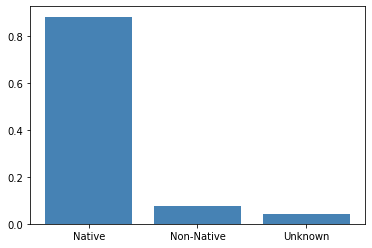

Native        88.362161
Non-Native     7.516549
Unknown        4.121290
Name: Nativeness, dtype: float64

In [39]:
nativeness_counts = species['Nativeness'].value_counts(normalize=True)
plt.bar(nativeness_counts.index, nativeness_counts.values, color = '#4682B4')
plt.show()
nativeness_counts * 100

We can see that a majority of our species (88%) are native to their environment.
Let's count the number of **Protected** and **Not Protected** species for **Native** and **Non-Native** species. We'll also calculate the percentages of protection for each group.

In [40]:
nativeness_protected_counts = species.pivot_table(columns = 'Protected', 
                                                 index = 'Nativeness', 
                                                 values = 'Scientific Name', 
                                                 aggfunc = 'count')
nativeness_protected_counts.columns = ['Not Protected', 'Protected']
nativeness_protected_counts  = nativeness_protected_counts.reset_index()

nativeness_protected_counts['Percent Protected'] = nativeness_protected_counts['Protected'] / \
                                                   (nativeness_protected_counts['Protected'] + \
                                                   nativeness_protected_counts['Not Protected']) * 100
nativeness_protected_counts

,Nativeness,Not Protected,Protected,Percent Protected
0,Native,2875,1263,30.521991
1,Non-Native,290,62,17.613636
2,Unknown,144,49,25.388601


There is a much higher number of **Native** species than **Non-Native** species in our dataset (4138 vs. 352) and that **Native** species also have a much higher rate of being protected (30.52% vs. 17.61%).
 
This is to be expected, but let's run a Chi-squared test to see if this difference is significant.

In [41]:
category1 = 'Native'
category2 = 'Non-Native'

nativeness_protected_table = species[(species['Nativeness'] == category1) | (species['Nativeness'] == category2)]
contingency_table5 = pd.crosstab(nativeness_protected_table['Nativeness'], nativeness_protected_table['Protected'])
print(contingency_table5)
print()
chi2, pvalue, dof, expected = chi2_contingency(contingency_table5)
print("Chi-squared test statistic:", chi2)
print("P-value:", pvalue)

Protected   False  True
Nativeness             
Native       2875  1263
Non-Native    290    62

Chi-squared test statistic: 25.368695667308685
P-value: 4.735405787894386e-07


The Chi-squared test resulted in a test statistic of 25.37 corresponding to a p-value of 4.74e-07 (0.0000005, clearly below the expected 0.05). This leads us to reject the null hypothesis.
This indicates that there is a statistical association between **Nativeness** and **Protected** status.
 
These results suggest that there does seem to be some bias favoring the protection of native species over non-native species.
This makes sense because native species are often more adapted and co-evolved with their local ecosystems while non-native species are often seen as invasive that compete with the native species. Oftentimes, non-native species need to be controlled or else the natural equilibrium of the local ecosystem might be jeopardized.

### Data Question #4: Are there any abundant species that are also classified as threatened or endangered?

Generally, we think of threatened species as being rarely encountered. But let's see if there are any species that are abundant (typically seen daily) but are also classified as being threatened or endangered. By investigating this possible phenomenon, we might be able to shed light on overlooked species and their conservation needs for protection.
 
Let's first count the number of protected and unprotected species by their **Abundance** categorization **(Abundant, Common, Occasional, Rare, Uncommon, Unknown)**. We won't use unique counts / aggregation of abundance categories, since species may vary in abundance across parks.

In [42]:
abundance_counts = species.pivot_table(columns = 'Protected',
                                      index = 'Abundance', 
                                      values = 'Scientific Name', 
                                      aggfunc = 'count')
abundance_counts.columns = ['Not Protected', 'Protected']
abundance_counts = abundance_counts.reset_index()

abundance_counts['Percent Protected'] = abundance_counts['Protected'] / \
                                        (abundance_counts['Protected'] + abundance_counts['Not Protected']) * 100

abundance_counts

,Abundance,Not Protected,Protected,Percent Protected
0,Abundant,173,37,17.619048
1,Common,973,306,23.924941
2,Occasional,319,189,37.204724
3,Rare,421,238,36.115326
4,Uncommon,648,276,29.870130
5,Unknown,244,72,22.784810


As expected, we see that the percentage of protection of **Abundant** and **Common** species are the lowest (17.62% and 23.92%), and the highest in **Occasional** and **Rare** species (37.20% and 36.12%).

Within these protected and abundant species, let's see if any of the species are also threatened or endangered.

In [43]:
abundant = species['Abundance'] == 'Abundant'
protected = (species['Conservation Status'] == 'Threatened') | (species['Conservation Status'] == 'Endangered')
protected_abundant_species = species[abundant & protected]

protected_abundant_species

,Scientific Name,Common Names,Category,Park Name,Nativeness,Abundance,Conservation Status,Protected
44082,Oncorhynchus Mykiss,Rainbow Trout,Fish,Yellowstone National Park,Non-Native,Abundant,Threatened,True


Interestingly, we find that **Rainbow Trout** in **Yellowstone National Park** are both **Abundant** and **Threatened**.
Further research reveals that this species was introduced into Yellowstone for sport fishing purposes, and conservation efforts are underway to maintain this population along side other trout species. ([yellowstone.org](https://www.yellowstone.org/native-fish/))
By recognizing this paradox, we can better understand the complexities surrounding the conservation needs of **Threatened** or **Endangered** species to develop more effective conservation strategies in the future.